### Importación de datos



In [18]:
from typing import Generator
import pandas as pd

datos_tienda = [
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
]

class Tienda:

  def __init__(self, alias: str, data: str) -> None:
    self.nombre = alias
    self.df_reader = pd.read_csv(data)
    self.df_reader["Fecha de Compra"] = pd.to_datetime(self.df_reader["Fecha de Compra"], format="%d/%m/%Y")

  def get_values(self, col: str) -> Generator:
    for value in self.df_reader[col].to_list():
      yield value

  def ventas(self) -> float:
    return round(self.df_reader["Precio"].sum(), 2)

  def categorías(self) -> dict:
    # when using gruopby the values in the col become the labels for
    # the row position in the new grouped table, with agg you can create custom
    # rows with aliases and defined values similar to the aggragate method
    # in django
    name_alias = f"total de ventas por categoría"
    # to_dict by default return values like {col: {index: value}}
    return self.df_reader.groupby("Categoría del Producto").agg(**{name_alias: ("Producto", "count")}).sort_values(by=name_alias, ascending=False).to_dict()

  def valoración_promedio(self, col: str) -> float:
    return round(self.df_reader[col].mean(), 2)

  def más_y_menos_vendido(self) -> dict:
    name_alias = f"producto más vendido en {self.nombre}"
    grouped = self.df_reader.groupby("Producto").agg(**{name_alias: ("Precio", "count")})
    más = grouped[name_alias].idxmax()
    menos = grouped[name_alias].idxmin()
    return {"más": {"producto": más, "cantidad": grouped.loc[más, name_alias]},
            "menos": {"producto": menos, "cantidad": grouped.loc[menos, name_alias]},
            }
  def ventas_por_año(self) -> dict:
    new_df = pd.DataFrame(self.df_reader["Fecha de Compra"].dt.year.tolist(),
                          self.df_reader["Precio"].tolist(), columns=["Precio", "Año de venta"])
    print(new_df)

  def sumario(self) -> dict:
    cantidad = self.más_y_menos_vendido()
    return {"tienda": self.nombre, "ventas": self.ventas(),
            "categorías y sus ventas": self.categorías(),
            "valoración promedio": self.valoración_promedio("Calificación"),
            "costo envio promedio": self.valoración_promedio("Costo de envío"),
            "item más vendido": cantidad["más"],
            "item menos vendido": cantidad["menos"]}

names = [f"tienda {i}" for i in range(1,5)]
resultados = []
for nombre, datos in zip(names, datos_tienda):
  resultados.append(Tienda(nombre, datos))



#1. Análisis de facturación



In [ ]:
# cantidades vendidas por cada tienda
for tienda_ob in resultados:
  print(tienda_ob.nombre, tienda_ob.ventas())



tienda 1 1150880400.0
tienda 2 1116343500.0
tienda 3 1098019600.0
tienda 4 1038375700.0


# 2. Ventas por categoría

In [ ]:
for tienda_ob in resultados:
  print(tienda_ob.categorías())

{'total de ventas por categoría': {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}}
{'total de ventas por categoría': {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}}
{'total de ventas por categoría': {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Artículos para el hogar': 177, 'Instrumentos musicales': 177}}
{'total de ventas por categoría': {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}}


# 3. Calificación promedio de la tienda


In [8]:
for tienda_ob in resultados:
  print(tienda_ob.nombre, tienda_ob.valoración_promedio("Calificación"))

tienda 1 3.98
tienda 2 4.04
tienda 3 4.05
tienda 4 4.0


# 4. Productos más y menos vendidos

In [ ]:
for tienda_ob in resultados:
  print(tienda_ob.nombre, tienda_ob.más_y_menos_vendido())

tienda 1 {'más': {'producto': 'Armario', 'cantidad': np.int64(60)}, 'menos': {'producto': 'Auriculares con micrófono', 'cantidad': np.int64(33)}}
tienda 2 {'más': {'producto': 'Iniciando en programación', 'cantidad': np.int64(65)}, 'menos': {'producto': 'Juego de mesa', 'cantidad': np.int64(32)}}
tienda 3 {'más': {'producto': 'Kit de bancas', 'cantidad': np.int64(57)}, 'menos': {'producto': 'Bloques de construcción', 'cantidad': np.int64(35)}}
tienda 4 {'más': {'producto': 'Cama box', 'cantidad': np.int64(62)}, 'menos': {'producto': 'Guitarra eléctrica', 'cantidad': np.int64(33)}}


# 5. Envío promedio por tienda

In [ ]:
for tienda_ob in resultados:
  print(tienda_ob.nombre, tienda_ob.valoración_promedio("Costo de envío"))

tienda 1 26018.61
tienda 2 25216.24
tienda 3 24805.68
tienda 4 23459.46


# 6. Ventas por año

In [19]:
resultados[0].ventas_por_año()

              0
164300.0   2021
192300.0   2022
209600.0   2021
757500.0   2022
335200.0   2020
...         ...
1284400.0  2021
282800.0   2023
122900.0   2021
691300.0   2022
195000.0   2022

[2359 rows x 1 columns]


# 7. Graficos

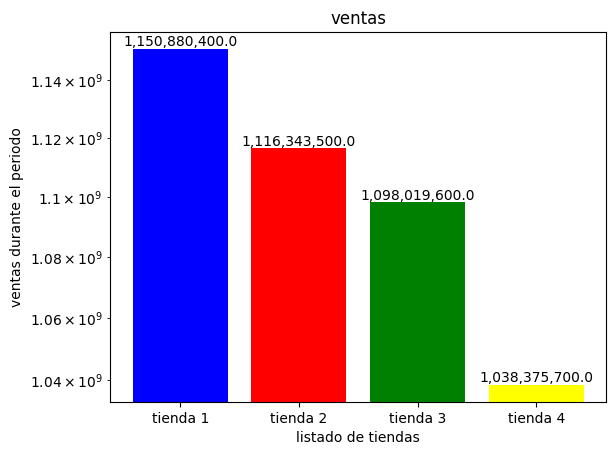

In [ ]:
import matplotlib.pyplot as plt
# ventas
ventas = [float(item.ventas()) for item in resultados]
nombres = [item.nombre for item in resultados]
colores = ["blue", "red", "green", "yellow"]
plt.bar(nombres, ventas, color=colores)
plt.yscale("log")
for count, item in enumerate(ventas):
  plt.text(count, item, f"{item:,}", ha='center', va='bottom')
plt.title("ventas")
plt.ylabel("ventas durante el periodo")
plt.xlabel("listado de tiendas")
plt.show()

# extra


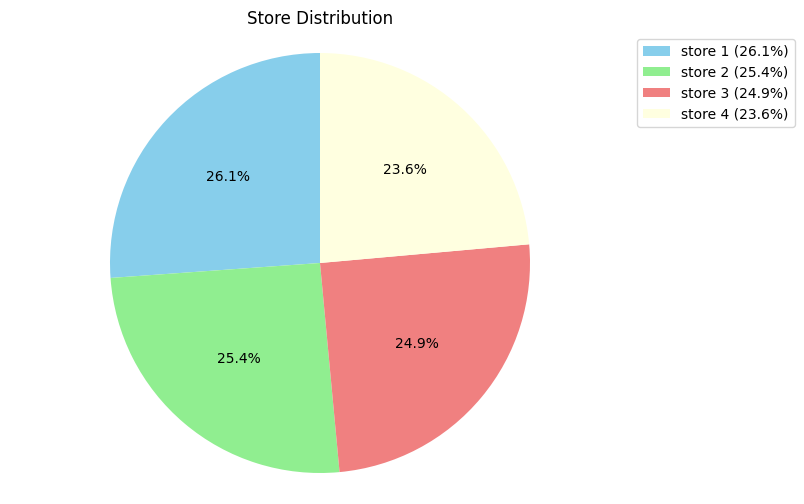

In [1]:
import matplotlib.pyplot as plt

# Data provided
data = """
store 1 1150880400.0
store 2 1116343500.0
store 3 1098019600.0
store 4 1038375700.0
"""

# Parse the data
stores = []
values = []
for line in data.strip().split('\n'):
    parts = line.split()
    stores.append(parts[0] + " " + parts[1])  # Store name
    values.append(float(parts[2]))  # Store value

# Calculate the percentage of each value in relation to the total sum of all values.
total_value = sum(values)
percentages = [value / total_value * 100 for value in values]

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed.
plt.pie(values, labels=None, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Add a title to the chart
plt.title('Store Distribution')

# Create a legend with store names and percentages
legend_labels = [f'{store} ({percentage:.1f}%)' for store, percentage in zip(stores, percentages)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the circle's proportion is maintained
plt.axis('equal')

# Display the chart
plt.show()